In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
import os
import cv2


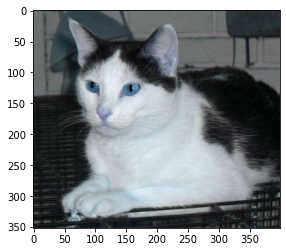

In [22]:
data='../input/cat-and-dog/test_set/test_set'
classes=['cats','dogs']

for catagory in classes:
    path=os.path.join(data,catagory)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break   

In [23]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [24]:
train_set=train_datagen.flow_from_directory(
"../input/cat-and-dog/training_set/training_set",
target_size=(150,150),
batch_size=256,
class_mode='sparse',
shuffle=True)

Found 8005 images belonging to 2 classes.


In [25]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [26]:
test_set=train_datagen.flow_from_directory(
"../input/cat-and-dog/test_set/test_set",
target_size=(150,150),
batch_size=256,
class_mode='sparse',
shuffle=True)

Found 2023 images belonging to 2 classes.


In [27]:
labels={0:"cats",
       1:"dogs"}
labels

{0: 'cats', 1: 'dogs'}

In [28]:
model=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(6,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)            

In [30]:
model.fit(x=train_set,validation_data=test_set,epochs=5)

Epoch 1/5
32/32 [==============================] - 86s 3s/step - loss: 1.0490 - accuracy: 0.4933 - val_loss: 0.6826 - val_accuracy: 0.5734
Epoch 2/5
32/32 [==============================] - 85s 3s/step - loss: 0.6788 - accuracy: 0.5733 - val_loss: 0.6365 - val_accuracy: 0.6485
Epoch 3/5
32/32 [==============================] - 83s 3s/step - loss: 0.6192 - accuracy: 0.6626 - val_loss: 0.5829 - val_accuracy: 0.7079
Epoch 4/5
32/32 [==============================] - 83s 3s/step - loss: 0.5963 - accuracy: 0.6672 - val_loss: 0.6015 - val_accuracy: 0.6772
Epoch 5/5
32/32 [==============================] - 82s 3s/step - loss: 0.5600 - accuracy: 0.7143 - val_loss: 0.5559 - val_accuracy: 0.7242


In [31]:
def predict(path):
    img=tf.keras.preprocessing.image.load_img(path,target_size=(150,150))
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    img=np.array([img])
    pred=labels[np.argmax(model.predict(img))]
    plt.imshow(img.reshape(150,150,3))
    plt.title(pred)

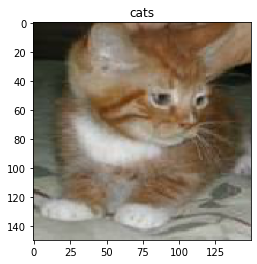

In [32]:
predict('../input/cat-and-dog/test_set/test_set/cats/cat.4030.jpg')

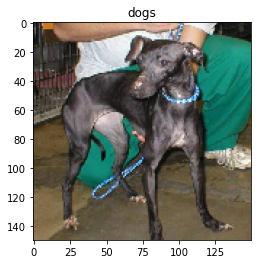

In [33]:
predict('../input/cat-and-dog/test_set/test_set/dogs/dog.4004.jpg')

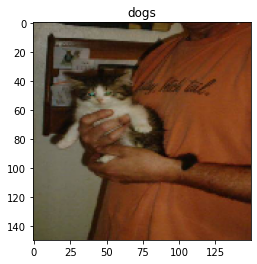

In [34]:
predict('../input/cat-and-dog/test_set/test_set/cats/cat.4002.jpg')